In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df[df.columns].nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [6]:
df.drop('id',axis=1,inplace=True)

**EDA**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [8]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
cat_col=df.select_dtypes(include='object').columns
num_col=df.select_dtypes(exclude='object').columns

In [12]:
for i in num_col:
    d_count=round(df[i].count(),2)
    d_max=round(df[i].max(),2)
    d_min=round(df[i].min(),2)
    d_mean=round(df[i].mean(),2)
    d_median=round(df[i].median(),2)
    d_std=round(df[i].std(),2)

    print(i,'count:',d_count)
    print(i,'max:',d_max)
    print(i,'min:',d_min)
    print(i,'mean:',d_mean)
    print(i,'median:',d_median)
    print(i,'std:',d_std)
    print('------------------------------------')

price count: 21613
price max: 7700000.0
price min: 75000.0
price mean: 540088.14
price median: 450000.0
price std: 367127.2
------------------------------------
bedrooms count: 21613
bedrooms max: 33
bedrooms min: 0
bedrooms mean: 3.37
bedrooms median: 3.0
bedrooms std: 0.93
------------------------------------
bathrooms count: 21613
bathrooms max: 8.0
bathrooms min: 0.0
bathrooms mean: 2.11
bathrooms median: 2.25
bathrooms std: 0.77
------------------------------------
sqft_living count: 21613
sqft_living max: 13540
sqft_living min: 290
sqft_living mean: 2079.9
sqft_living median: 1910.0
sqft_living std: 918.44
------------------------------------
sqft_lot count: 21613
sqft_lot max: 1651359
sqft_lot min: 520
sqft_lot mean: 15106.97
sqft_lot median: 7618.0
sqft_lot std: 41420.51
------------------------------------
floors count: 21613
floors max: 3.5
floors min: 1.0
floors mean: 1.49
floors median: 1.5
floors std: 0.54
------------------------------------
waterfront count: 21613
waterf

**Creating a distribution plot**

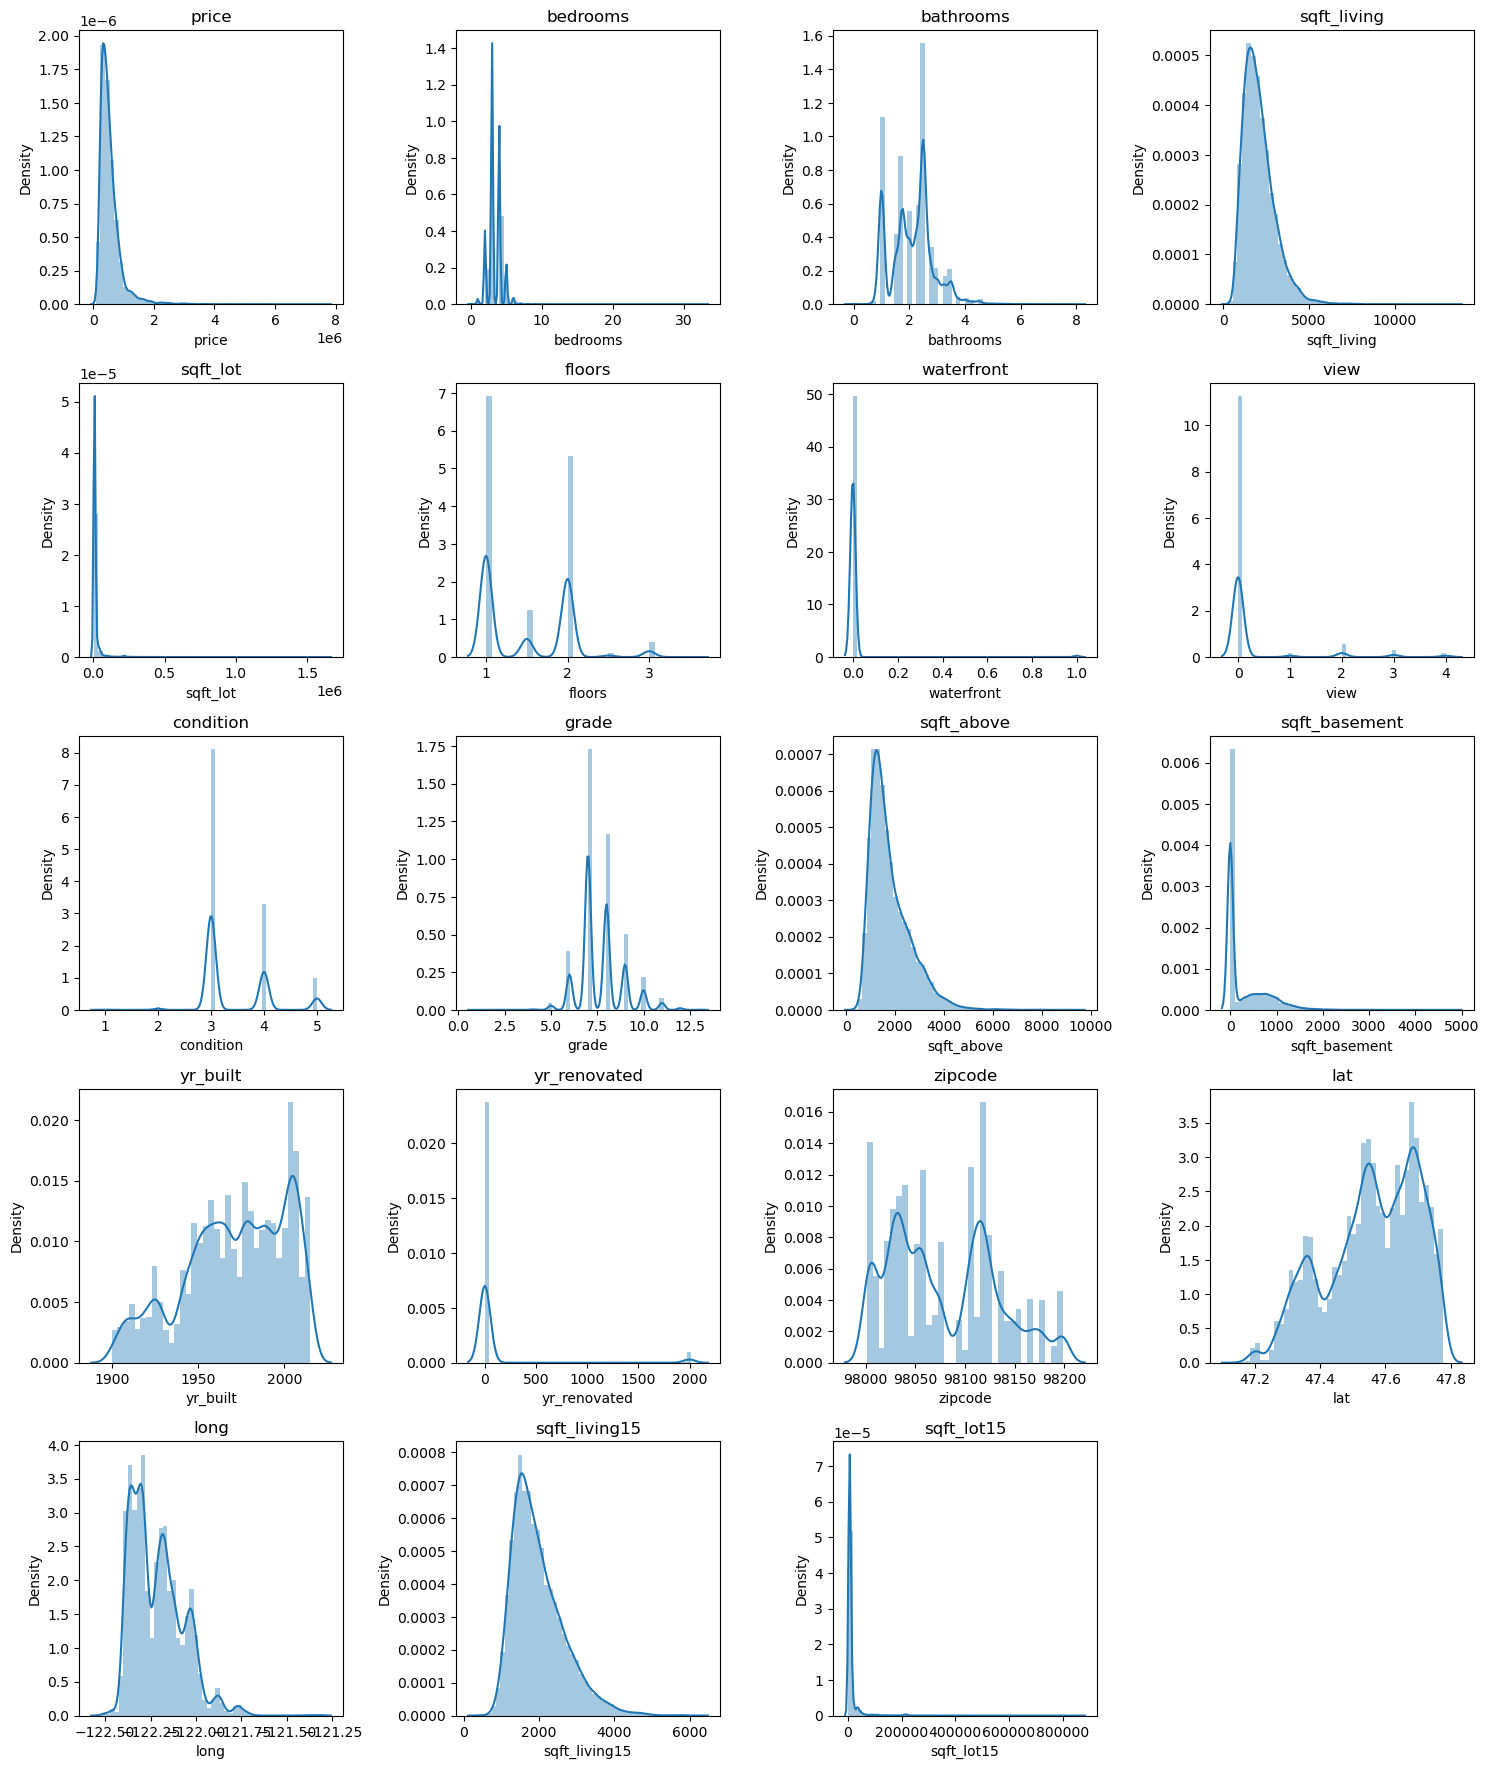

In [13]:
plt.figure(figsize=(15,35))
for i,column in enumerate(num_col):
    plt.subplot(10,4,i+1)
    plt.title(column)
    sns.distplot(df[column])
plt.tight_layout()
plt.show()

In [14]:
df["waterfront"].value_counts().reset_index()

,waterfront,count
0,0,21450
1,1,163


In [15]:
df["view"].value_counts().reset_index()

,view,count
0,0,19489
1,2,963
2,3,510
3,1,332
4,4,319


In [16]:
df["yr_renovated"].value_counts().reset_index()

,yr_renovated,count
0,0,20699
1,2014,91
2,2013,37
3,2003,36
4,2005,35
...,...,...
65,1951,1
66,1959,1
67,1948,1
68,1954,1


In [17]:
df['sqft_lot15'].value_counts().reset_index()

,sqft_lot15,count
0,5000,427
1,4000,357
2,6000,289
3,7200,211
4,4800,145
...,...,...
8684,25927,1
8685,35943,1
8686,5107,1
8687,1514,1


**WE can see   Waterfront,   'View' and yr_renovated' Most values is zero so we are dropping that coloumns**

In [18]:
df.drop(["waterfront","view","zipcode","yr_renovated"],axis =1 ,inplace = True)

**ploting a Boxplot**

In [19]:
num_col=df.select_dtypes(exclude='object').columns #Reassigning the numerical values after dropping the column

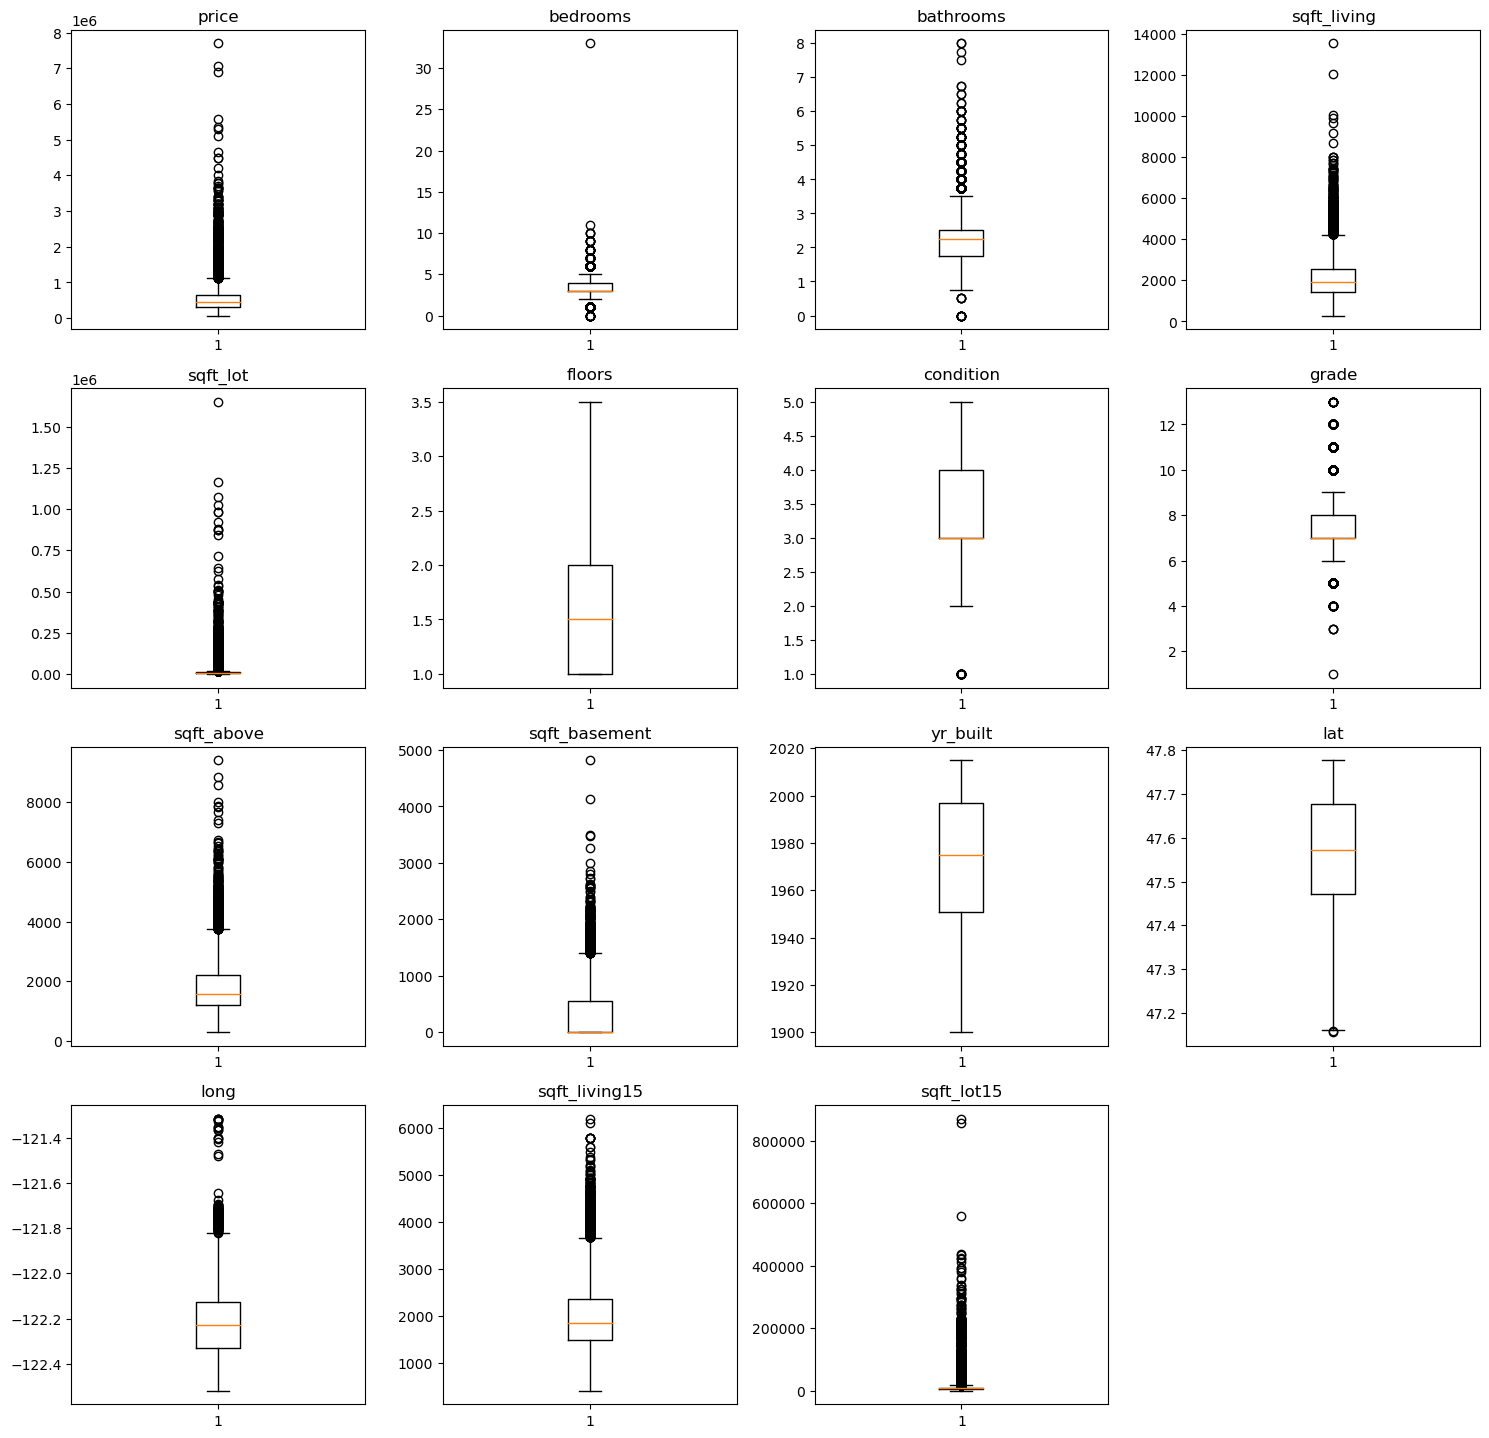

In [20]:
plt.figure(figsize=(15,25))
for i,column in enumerate(num_col):
    plt.subplot(7,4,i+1)
    plt.title(column)
    plt.boxplot(df[column])
plt.tight_layout()
plt.show()

**SCaling_Data**

In [21]:
datetime_column = df['date']

In [22]:
numeric_columns = df.drop(["grade","condition","floors","bathrooms","bedrooms"],axis=1).select_dtypes(include=['float64', 'int64']).columns
numeric_data=df[numeric_columns]
# Apply RobustScaler to numeric data
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)

# Combine scaled numeric data with the datetime column
scaled_df = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

In [23]:
scaled_df

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,-0.866717,-0.979835,-0.228321,-0.734708,-0.658681,-0.544898,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.005688,0.533634,-0.189885,0.460841,0.245141,-0.681079,1.161568,-0.746341,-0.432686,-0.187868
2,-0.980849,-1.426254,-0.123298,-1.229834,-0.658681,-1.293892,1.283537,-0.135655,1.070140,-0.172375
3,0.174090,-0.130550,-0.244014,-0.891699,1.397515,-0.204446,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.081958,-0.435422,-0.169653,-0.130895,-0.658681,0.544548,0.409550,1.199335,-0.272190,-0.192849
...,...,...,...,...,...,...,...,...,...,...
21608,-0.490545,-0.598746,-0.337424,-0.312039,-0.658681,1.293542,1.004958,-0.938069,-0.666135,-0.412381
21609,-0.381588,0.250539,-0.224386,0.629908,-0.658681,1.463768,-0.356180,-1.051685,-0.228419,-0.203946
21610,-0.375865,-1.154047,-0.332137,-0.927928,-0.658681,1.293542,0.247888,-0.604321,-1.410253,-0.394141
21611,-0.381588,-0.522528,-0.307076,-0.227505,-0.658681,1.123316,-0.184414,1.028910,-0.841221,-0.420511


**Data Transformation**

In [24]:
numeric_data = scaled_df[numeric_columns]

transformer = PowerTransformer(method = "yeo-johnson")  # Apply RobustScaler to numeric data
transformed_numeric_data = transformer.fit_transform(numeric_data)

# Combine scaled numeric data with the datetime column
transformed_df = pd.DataFrame(transformed_numeric_data, columns=numeric_columns) 
transformed_df['date'] = datetime_column 
transformed_df[['grade','condition','floors','bathrooms','bedrooms']] = df[['grade','condition','floors','bathrooms','bedrooms']]

In [25]:
def outliers(df,ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1 
    
    lower_limit = q1 - iqr *1.5
    upper_limit = q3 + iqr *1.5
    
    ls = df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]
    
    return ls

In [26]:
transformed_df.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date',
       'grade', 'condition', 'floors', 'bathrooms', 'bedrooms'],
      dtype='object')

In [27]:
index_list = []
for featsure in numeric_columns:
    index_list.extend(outliers(transformed_df,featsure))

In [28]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [29]:
transformed_df = remove(transformed_df,index_list)

In [30]:
transformed_df.shape

(20698, 16)

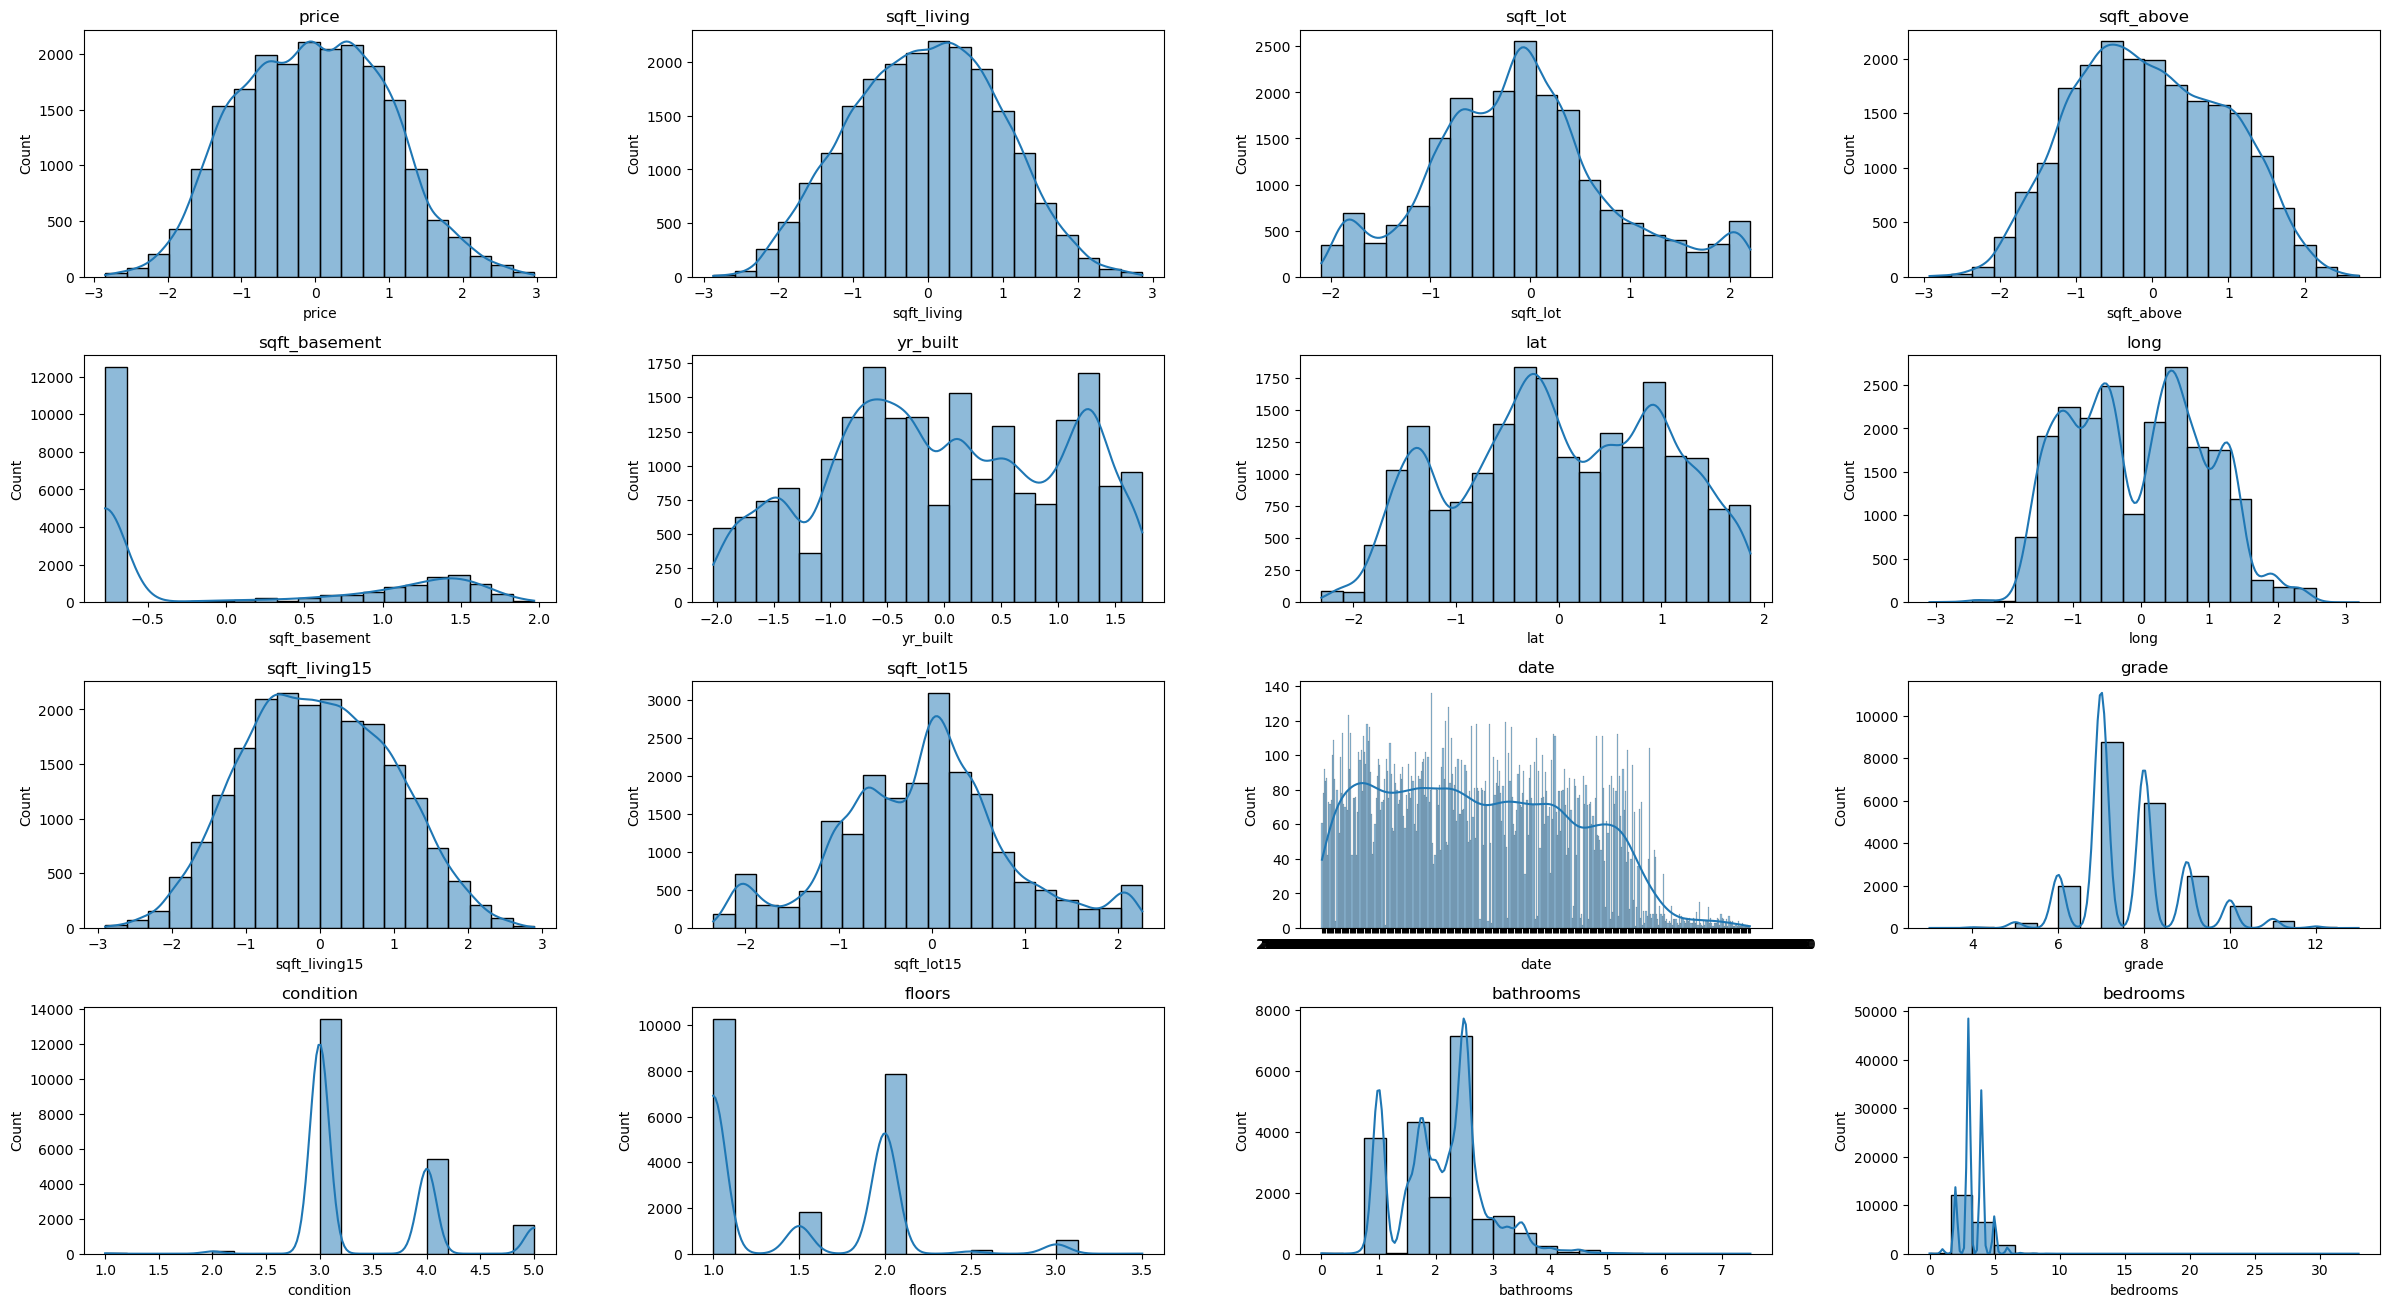

In [31]:
plt.figure(figsize=(24, 16))
for feature in transformed_df.columns.to_list():
    plt.subplot(5, 4, transformed_df.columns.to_list().index(feature) + 1)
    sns.histplot(data=transformed_df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

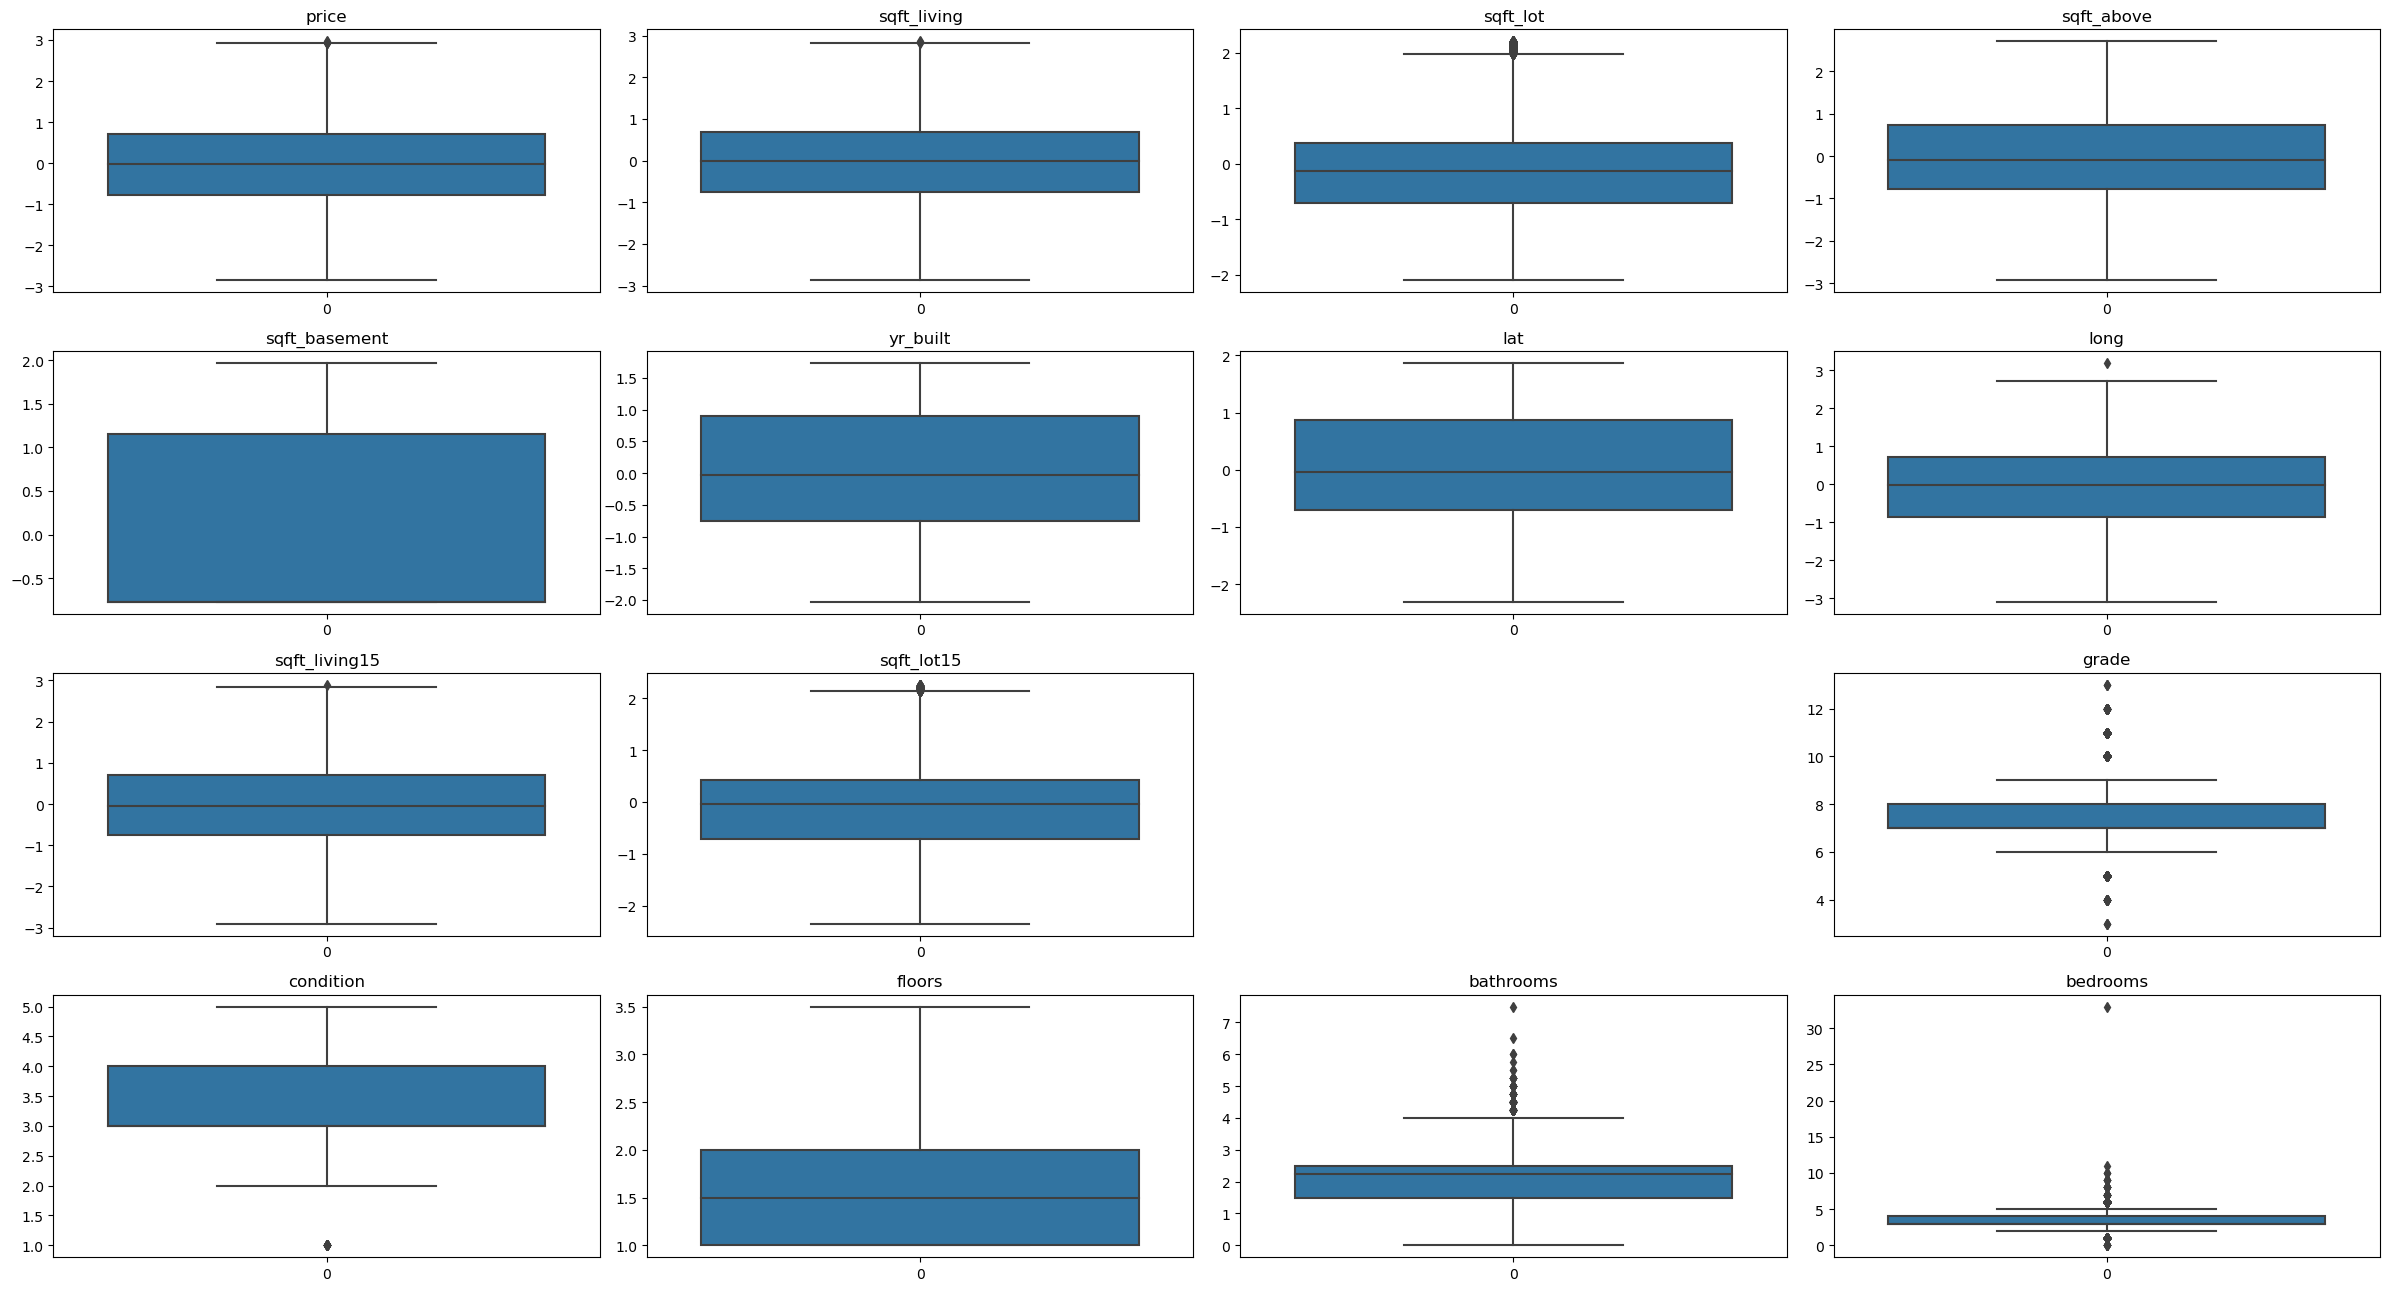

In [32]:
plt.figure(figsize=(24, 16))
for feature in transformed_df.drop('date',axis=1).columns.to_list():
    plt.subplot(5, 4, transformed_df.columns.to_list().index(feature)+1)
    sns.boxplot(data=transformed_df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

**Correlation Matrix**

In [33]:
# Assuming transformed_df is your DataFrame
correlation_matrix = transformed_df.drop('date',axis=1).corr()

# Print or visualize the correlation matrix
print(correlation_matrix)


                  price  sqft_living  sqft_lot  sqft_above  sqft_basement  \
price          1.000000     0.654754  0.095211    0.551934       0.257372   
sqft_living    0.654754     1.000000  0.318617    0.854583       0.333644   
sqft_lot       0.095211     0.318617  1.000000    0.287862       0.046167   
sqft_above     0.551934     0.854583  0.287862    1.000000      -0.170021   
sqft_basement  0.257372     0.333644  0.046167   -0.170021       1.000000   
yr_built       0.086157     0.345077 -0.075161    0.463391      -0.186929   
lat            0.457107     0.034966 -0.098220   -0.022969       0.118371   
long           0.040355     0.267152  0.338806    0.375746      -0.208415   
sqft_living15  0.589207     0.749656  0.370524    0.705123       0.130657   
sqft_lot15     0.079080     0.295720  0.914514    0.267557       0.037155   
grade          0.677102     0.730643  0.189518    0.721486       0.089465   
condition      0.045188    -0.044268  0.102463   -0.145641       0.169340   

**Plotting a heat map**

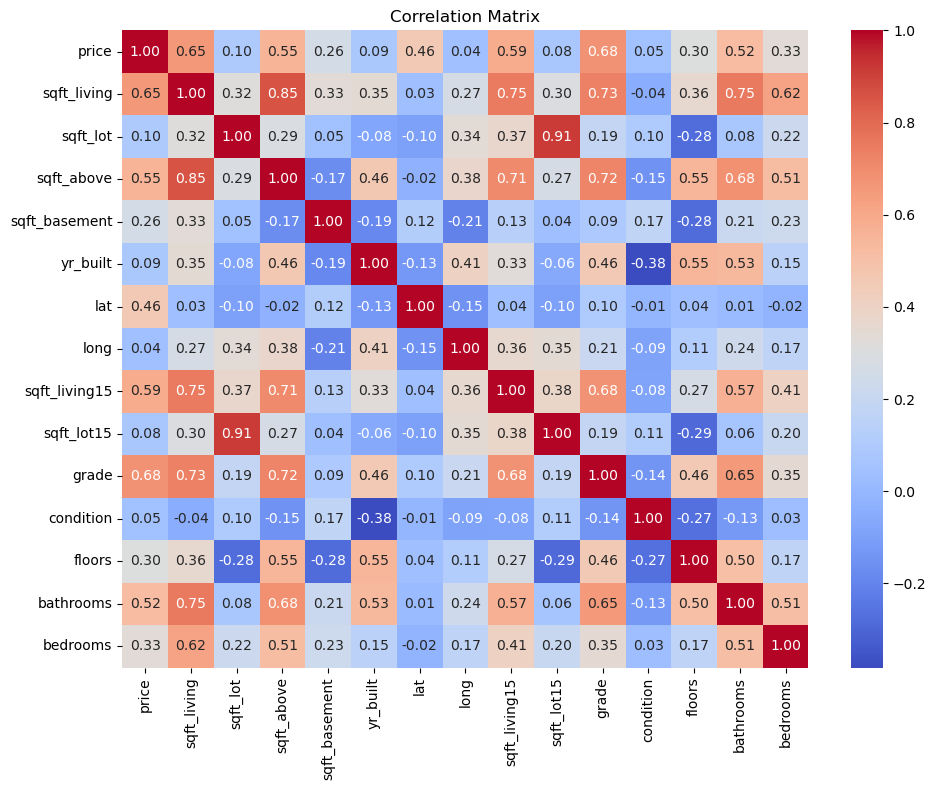

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [35]:
transformed_df.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date',
       'grade', 'condition', 'floors', 'bathrooms', 'bedrooms'],
      dtype='object')

In [36]:
transformed_df.drop('date',axis=1,inplace=True) #dropping data coloum

**Spliting Data into two parts train and test**

In [37]:
X = transformed_df.drop('price',axis=1)
y = transformed_df['price']

In [38]:
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.2 , random_state=0)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16558, 14)
y_train shape: (16558,)
X_test shape: (4140, 14)
y_test shape: (4140,)


In [39]:
X_train.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,grade,condition,floors,bathrooms,bedrooms
12470,-0.686211,-0.041047,-0.246907,-0.772306,-1.804143,-0.977887,0.305958,-1.032366,0.550769,7,5,1.5,1.00,3
4247,-1.635043,0.330158,-1.346304,-0.772306,-1.804143,-0.303384,-1.471811,-1.105216,0.236493,6,3,1.0,1.00,2
13642,1.355355,1.090296,0.269528,1.757315,-0.368317,-1.020783,-0.990227,1.195496,1.224874,8,3,1.0,2.50,6
18610,-1.716751,-0.641033,-1.446395,-0.772306,-0.615883,-0.488311,-1.483472,-0.751775,-0.246031,6,4,1.0,1.00,2
6484,-0.569983,0.460298,-0.122210,-0.772306,-0.270359,1.415679,0.348098,-0.596253,0.085567,7,4,1.0,1.75,4


In [40]:
y_train.head()

12470   -1.220111
4247    -0.417539
13642    0.499620
18610   -0.701196
6484    -0.132282
Name: price, dtype: float64

**Developing the Model**

In [41]:
lrm =  LinearRegression()
lrm.fit(X_train,y_train)

LinearRegression()

In [42]:
y_pred = lrm.predict(X_test)

In [43]:
lrm.score(X_train,y_train)

0.7401016768418456

In [44]:
r2_lr=r2_score(y_test , y_pred)
mae_lr=mean_absolute_error(y_test , y_pred)
mse_lr=mean_squared_error(y_test , y_pred)
rmse_lr=np.sqrt(mse_lr)
print("Test Mean Absolute Error :", round(mae_lr, 2))
print("Test Mean Sqaure Error :", round(mse_lr, 2))
print("Test Root Mean Sqaure Error :", round(rmse_lr, 2))
print("Test R2 Score:", round(r2_lr, 2))

Test Mean Absolute Error : 0.4
Test Mean Sqaure Error : 0.26
Test Root Mean Sqaure Error : 0.51
Test R2 Score: 0.74


In [45]:
cv_lr=cross_val_score(lrm, X, y,cv=5) 
cv_lr

array([0.73849006, 0.73285911, 0.73852037, 0.74618621, 0.72790151])

In [46]:
print("the mean of cross_val_score is ",cv_lr.mean())

the mean of cross_val_score is  0.7367914502434063


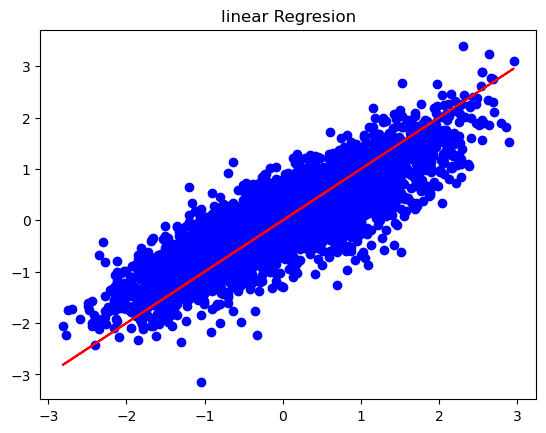

In [47]:
# liner regresion graph 
plt.scatter(y_test,y_pred, color="b")
plt.plot(y_test,y_test, color="r")
plt.title("linear Regresion");

Text(0.5, 1.0, 'Feature Importance')

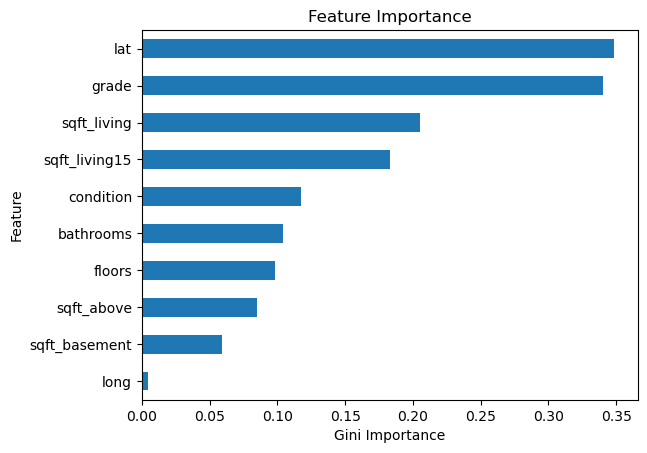

In [48]:
# this is the importance of each fetuer  
importances = lrm.coef_ 
features = X_test.columns
feat_imp = pd.Series(importances , index= features)
feat_imp.sort_values().tail(10).plot(kind= 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")

**With Hyper Parameter Tuning**

In [49]:
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, 1, -1],
}

grid_search = GridSearchCV(estimator=lrm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [None, 1, -1]},
             scoring='neg_mean_squared_error')

In [50]:
params=grid_search.best_params_
params

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None}

In [51]:
grid_search.best_score_

-0.2586497720189304

In [52]:
grid_search.best_score_*-1

0.2586497720189304

In [54]:
linear_reg = LinearRegression(**params)
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

r2_lr_h = r2_score(y_test, y_pred)

mse_lr_h = mean_squared_error(y_test, y_pred)

mae_lr_h=mean_absolute_error(y_test,y_pred)

rmse_lr_h = np.sqrt(mse_lr_h)


print("Test Mean Absolute Error :", round(mse_lr_h, 2))
print("Test Mean Sqaure Error :", round(mae_lr_h, 2))
print("Test Root Mean Sqaure Error :", round(rmse_lr_h, 2))
print("Test R2 Score:", round(r2_lr_h, 2))

Test Mean Absolute Error : 0.26
Test Mean Sqaure Error : 0.4
Test Root Mean Sqaure Error : 0.51
Test R2 Score: 0.74


**With Random Forest Model**

In [55]:
rm=RandomForestRegressor()
rm.fit(X_train,y_train)

RandomForestRegressor()

In [56]:
y_pred_rm=rm.predict(X_test)

print("Train Score ",rm.score(X_train,y_train))
print('=============================================================================')
print("Test Score ", rm.score(X_test,y_test))
print('=============================================================================')
r2_rm=r2_score(y_test , y_pred)
mae_rm=mean_absolute_error(y_test , y_pred)
mse_rm=mean_squared_error(y_test , y_pred)
rmse_rm=np.sqrt(mse_rm)
print("Test Mean Absolute Error :", round(mae_rm, 2))
print("Test Mean Sqaure Error :", round(mse_rm, 2))
print("Test Root Mean Sqaure Error :", round(rmse_rm, 2))
print("Test R2 Score:", round(r2_rm, 2))

print('=============================================================================')

Train Score  0.9821349130985795
Test Score  0.8873568993465779
Test Mean Absolute Error : 0.4
Test Mean Sqaure Error : 0.26
Test Root Mean Sqaure Error : 0.51
Test R2 Score: 0.74


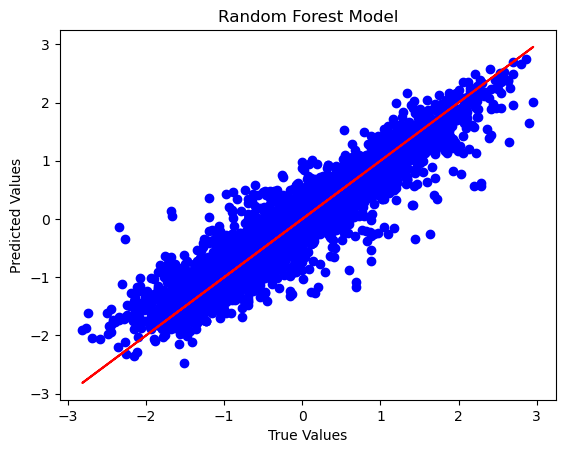

In [57]:
# Random Forest graph 
plt.scatter(y_test,y_pred_rm, color="b")
plt.plot(y_test,y_test, color="r")
plt.title("Random Forest Model")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

**KNN**

In [58]:
knn = KNeighborsRegressor(n_neighbors=7, weights="uniform", metric="manhattan")
knn.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=7)

In [59]:
y_pred_knn=knn.predict(X_test)
print("Train Score ",knn.score(X_train,y_train))
print('=============================================================================')
print("Test Score ", knn.score(X_test,y_test))
print('=============================================================================')
r2_knn=r2_score(y_test , y_pred_knn)
mae_knn=mean_absolute_error(y_test , y_pred_knn)
mse_knn=mean_squared_error(y_test , y_pred_knn)
rmse_knn=np.sqrt(mse_knn)
print("Test Mean Absolute Error :", round(mae_knn, 2))
print("Test Mean Sqaure Error :", round(mse_knn, 2))
print("Test Root Mean Sqaure Error :", round(rmse_knn, 2))
print("Test R2 Score:", round(r2_knn, 2))

print('=============================================================================')

Train Score  0.8851385541103753
Test Score  0.8499915809348155
Test Mean Absolute Error : 0.28
Test Mean Sqaure Error : 0.15
Test Root Mean Sqaure Error : 0.39
Test R2 Score: 0.85


In [60]:
cv=cross_val_score(knn, X, y,cv=10) 
cv

array([0.84070364, 0.85006869, 0.84282777, 0.83938202, 0.83763347,
       0.85321346, 0.84712153, 0.85025001, 0.8511568 , 0.82841498])

In [61]:
print("the mean of cross_val_score is ",cv.mean())

the mean of cross_val_score is  0.8440772381615249


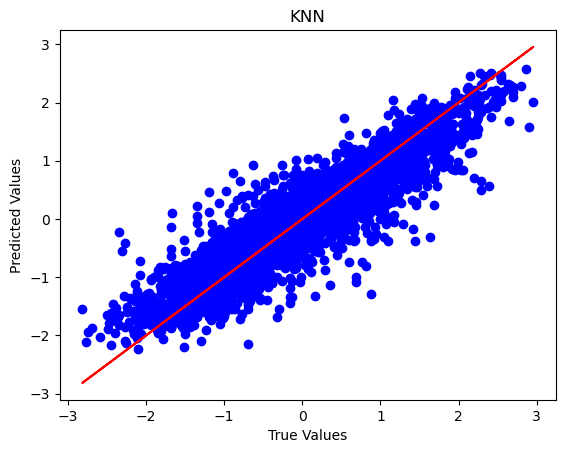

In [64]:
# KNN graph 
plt.scatter(y_test,y_pred_knn, color="b")
plt.plot(y_test,y_test, color="r")
plt.title("KNN")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [65]:
xgb = XGBRegressor()
xgb.fit(X_test,y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
y_pred_xgb=xgb.predict(X_test)

In [67]:
print ("train accuracy",xgb.score(X_train , y_train))
print ("test accuracy",xgb.score(X_test , y_test))
print('=============================================================================')
print()
r2_xgb=r2_score(y_test , y_pred_xgb)
mae_xgb=mean_absolute_error(y_test , y_pred_xgb)
mse_xgb=mean_squared_error(y_test , y_pred_xgb)
rmse_xgb=np.sqrt(mse_xgb)
print("Test Mean Absolute Error :", round(mae_xgb, 2))
print("Test Mean Sqaure Error :", round(mse_xgb, 2))
print("Test Root Mean Sqaure Error :", round(rmse_xgb, 2))
print("Test R2 Score:", round(r2_xgb, 2))

train accuracy 0.8661256705631089
test accuracy 0.9881713364074223

Test Mean Absolute Error : 0.08
Test Mean Sqaure Error : 0.01
Test Root Mean Sqaure Error : 0.11
Test R2 Score: 0.99


In [68]:
cv=cross_val_score(xgb, X, y,cv=10) 
cv

array([0.88929185, 0.89272783, 0.89166425, 0.89123654, 0.88587096,
       0.88786294, 0.89356097, 0.89528584, 0.90054569, 0.89302795])

In [69]:
print("the mean of cross_val_score is ",cv.mean())

the mean of cross_val_score is  0.8921074823202387


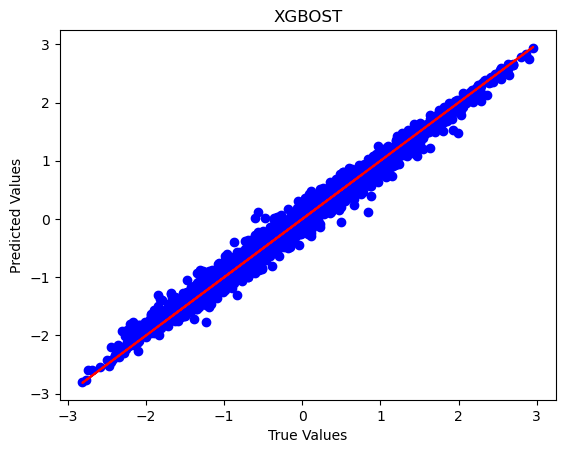

In [73]:
# XGB graph 
plt.scatter(y_test,y_pred_xgb, color="b")
plt.plot(y_test,y_test, color="r")
plt.title("XGBOST")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [74]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [75]:
y_pred_dt=dt.predict(X_test)
print ("train accuracy",dt.score(X_train , y_train))
print ("test accuracy",dt.score(X_test , y_test))
print('=============================================================================')
print()
r2_dt=r2_score(y_test , y_pred_dt)
mae_dt=mean_absolute_error(y_test , y_pred_dt)
mse_dt=mean_squared_error(y_test , y_pred_dt)
rmse_dt=np.sqrt(mse_dt)
print("Test Mean Absolute Error :", round(mae_dt, 2))
print("Test Mean Sqaure Error :", round(mse_dt, 2))
print("Test Root Mean Sqaure Error :", round(rmse_dt, 2))
print("Test R2 Score:", round(r2_dt, 2))

train accuracy 0.9968720233705896
test accuracy 0.7789742393829189

Test Mean Absolute Error : 0.34
Test Mean Sqaure Error : 0.22
Test Root Mean Sqaure Error : 0.47
Test R2 Score: 0.78


In [76]:
cv=cross_val_score(xgb, X, y,cv=10) 
cv

array([0.88929185, 0.89272783, 0.89166425, 0.89123654, 0.88587096,
       0.88786294, 0.89356097, 0.89528584, 0.90054569, 0.89302795])

In [77]:
print("the mean of cross_val_score is ",cv.mean())

the mean of cross_val_score is  0.8921074823202387


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay

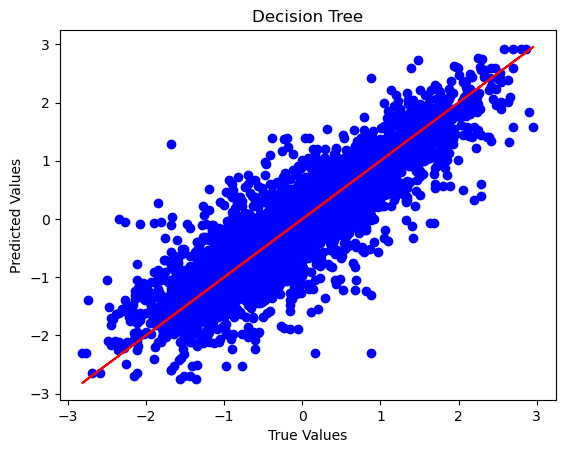

In [79]:
# Decision Tree graph 
plt.scatter(y_test,y_pred_dt, color="b")
plt.plot(y_test,y_test, color="r")
plt.title("Decision Tree")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [80]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [81]:
y_pred_gbr=gbr.predict(X_test)
print ("train accuracy",gbr.score(X_train , y_train))
print ("test accuracy",gbr.score(X_test , y_test))
print('=============================================================================')
print()
r2_gbr=r2_score(y_test , y_pred_dt)
mae_gbr=mean_absolute_error(y_test , y_pred_dt)
mse_gbr=mean_squared_error(y_test , y_pred_dt)
rmse_gbr=np.sqrt(mse_gbr)
print("Test Mean Absolute Error :", round(mae_gbr, 2))
print("Test Mean Sqaure Error :", round(mse_gbr, 2))
print("Test Root Mean Sqaure Error :", round(rmse_gbr, 2))
print("Test R2 Score:", round(r2_gbr, 2))

train accuracy 0.8832544607663333
test accuracy 0.8759260470060019

Test Mean Absolute Error : 0.34
Test Mean Sqaure Error : 0.22
Test Root Mean Sqaure Error : 0.47
Test R2 Score: 0.78


In [82]:
cv=cross_val_score(xgb, X, y,cv=10) 
cv

array([0.88929185, 0.89272783, 0.89166425, 0.89123654, 0.88587096,
       0.88786294, 0.89356097, 0.89528584, 0.90054569, 0.89302795])

In [83]:
print("the mean of cross_val_score is ",cv.mean())

the mean of cross_val_score is  0.8921074823202387


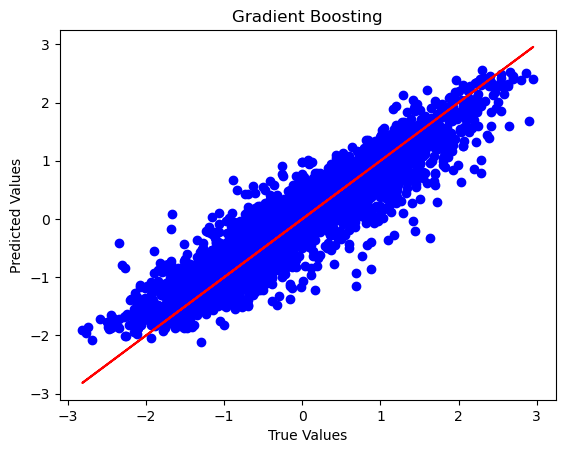

In [84]:
# Gradient Boosting graph 
plt.scatter(y_test,y_pred_gbr, color="b")
plt.plot(y_test,y_test, color="r")
plt.title("Gradient Boosting")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [85]:
d1={"R2_Score" :[r2_dt,r2_gbr,r2_knn,r2_lr,r2_rm,r2_xgb,r2_lr_h],
   "Mean Sqaure Error ":[mse_dt,mse_gbr,mse_knn,mse_lr,mse_rm,mse_xgb,mse_lr_h],
   "Mean Absolute Error ":[mae_dt,mae_gbr,mae_knn,mae_lr,mae_rm,mae_xgb,mae_lr_h]}

pd.DataFrame(d1, index=['Decision Tree', 
                             'Gradient Boosting', 
                             'KNN', 'Linear Regression', 
                             'Ridge Regression', 'XGBoost', 
                             'Linear Regression with Hyperparameters'])

,R2_Score,Mean Sqaure Error,Mean Absolute Error
Decision Tree,0.778974,0.222578,0.337641
Gradient Boosting,0.778974,0.222578,0.337641
KNN,0.849992,0.151062,0.282315
Linear Regression,0.744169,0.257628,0.397849
Ridge Regression,0.744169,0.257628,0.397849
XGBoost,0.988171,0.011912,0.078383
Linear Regression with Hyperparameters,0.744169,0.257628,0.397849
